## **Setup the environment**
- **Run it in Colab**
- **When asked DO NOT RESTART THE SESSION**

In [ ]:
! wget https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
! tar -xvf lorasim-20170710.tgz

!sudo apt-get install python2 && curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py && python2 get-pip.py && rm get-pip.py
!sudo apt install python-tk
!pip2 install -r 'lorasim/requirements.txt'


--2025-04-27 08:11:39--  https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
Resolving www.lancaster.ac.uk (www.lancaster.ac.uk)... 148.88.65.80, 2001:630:80:2ff::80:1
Connecting to www.lancaster.ac.uk (www.lancaster.ac.uk)|148.88.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112640 (110K) [application/x-gzip]
Saving to: ‘lorasim-20170710.tgz’

lorasim-20170710.tg 100%[===================>] 110.00K   507KB/s    in 0.2s    

2025-04-27 08:11:40 (507 KB/s) - ‘lorasim-20170710.tgz’ saved [112640/112640]

lorasim/
lorasim/loraDir.py
lorasim/loraDirMulBS.py
lorasim/oneDirectionalLoraIntf.py
lorasim/requirements.txt
lorasim/directionalLoraIntf.py
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2-minimal
  python2.7 python2.7-minimal
Suggested packages:
  python2-doc python-tk pyth

### **Import libraries**

In [ ]:
import os
import pandas as pd
import math

### **Execute simulations**

In [ ]:
import subprocess

def simulate(n_nodes, tx_rate, exp, duration, num_of_bs):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDirMulBS.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(int(num_of_bs)),
            str(int(1)),
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

    # Print the output
    # print(result.stdout)
    # print(result.stderr)

In [ ]:
duration = 86400000
tx_rate = 1e6

def simulate_multiple_nodes(number_of_nodes):
  for n_nodes in list(range(1,10)) + list(range(10,300,10)) + list(range(300,1700,100)):
    print(f"Simulating {n_nodes} nodes")
    simulate(n_nodes, tx_rate, 0, duration, number_of_nodes)

import pandas as pd

data_dict = {}

for i in [24, 8, 4, 3, 2, 1]:
    simulate_multiple_nodes(i)
    data = pd.read_csv(f"exp0BS{i}.dat", sep=" ")
    data_dict[i] = data

Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 20 nodes
Simulating 30 nodes
Simulating 40 nodes
Simulating 50 nodes
Simulating 60 nodes
Simulating 70 nodes
Simulating 80 nodes
Simulating 90 nodes
Simulating 100 nodes
Simulating 110 nodes
Simulating 120 nodes
Simulating 130 nodes
Simulating 140 nodes
Simulating 150 nodes
Simulating 160 nodes
Simulating 170 nodes
Simulating 180 nodes
Simulating 190 nodes
Simulating 200 nodes
Simulating 210 nodes
Simulating 220 nodes
Simulating 230 nodes
Simulating 240 nodes
Simulating 250 nodes
Simulating 260 nodes
Simulating 270 nodes
Simulating 280 nodes
Simulating 290 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes
Simulating 1000 nodes
Simulating 1100 nodes
Simulating 1200 nodes
Simulating 1300 

In [ ]:
for i in [24, 8, 4, 3, 2, 1]:
    data = pd.read_csv(f"exp0BS{i}.dat", sep=" ")
    data_dict[i] = data

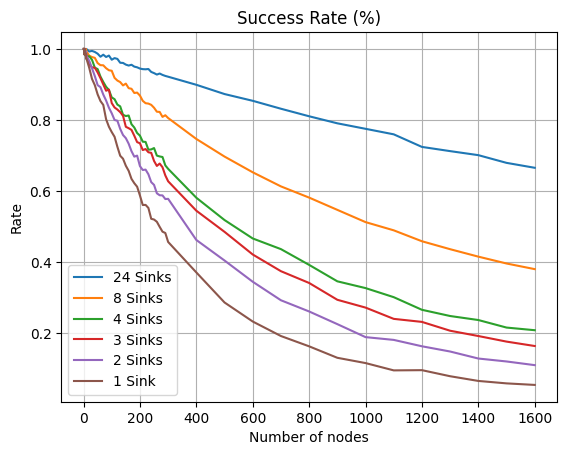

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(data_dict[24]["#nrNodes"], data_dict[24]["DER"], label="24 Sinks")
plt.plot(data_dict[8]["#nrNodes"], data_dict[8]["DER"], label="8 Sinks")
plt.plot(data_dict[4]["#nrNodes"], data_dict[4]["DER"], label="4 Sinks")
plt.plot(data_dict[3]["#nrNodes"], data_dict[3]["DER"], label="3 Sinks")
plt.plot(data_dict[2]["#nrNodes"], data_dict[2]["DER"], label="2 Sinks")
plt.plot(data_dict[1]["#nrNodes"], data_dict[1]["DER"], label="1 Sink")
plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()